In [11]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import geoplot
import geoplot.crs as gcrs

## Goal 1

find the distance between various airports
1. Halifax, lagos
2. Bangkok, Beijing
3. SLC, Auckland

In [3]:
df = pd.read_csv('airports.csv')
df.head(1)

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports


In [4]:
df['coordinates'] = list(zip(df.Longitude, df.Latitude))
df['coordinates'] = df['coordinates'].apply(Point)
gdf = geopandas.GeoDataFrame(df, geometry = 'coordinates')

In [5]:
halifax = gdf[gdf['Name'] == 'Halifax / CFB Shearwater Heliport' ].reset_index().coordinates
lagos = gdf[gdf['Name'] == 'Murtala Muhammed International Airport' ].reset_index().coordinates

bangkok = gdf[gdf['Name'] == 'Don Mueang International Airport' ].reset_index().coordinates
beijing = gdf[gdf['Name'] == 'Beijing Capital International Airport' ].reset_index().coordinates

slc = gdf[gdf['Name'] == 'Salt Lake City International Airport' ].reset_index().coordinates
auckland = gdf[gdf['Name'] == 'Auckland International Airport' ].reset_index().coordinates


print('Halifax to Lagos', halifax.distance(lagos)[0])
print('Bangkok to Beijing', bangkok.distance(beijing)[0])
print('Salt Lake to Auckland', slc.distance(auckland)[0])

Halifax to Lagos 76.90077039796525
Bangkok to Beijing 30.65998230105051
Salt Lake to Auckland 297.1352055031653


## Goal 2
1. Find the country with the smallest and largest in the southern hemisphere
2. Find the continent with the largest and smallest area in the southern hemisphere

In [6]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...


In [7]:
world['area'] = world.area
south = world.cx[0:, :0]

south_min = south.loc[south['area'].idxmin()]
south_max = south.loc[south['area'].idxmax()]
#print(south_min, south_max)
print('Vanuatu has the smallest area of any country in the southern hemisphere, and Antarctica has the largest.\n')

continent = world.dissolve(by = 'continent', aggfunc = 'sum')
con_min = continent.loc[continent['area'].idxmin()]
con_max = continent.loc[continent['area'].idxmax()]
#print(con_min, con_max)

print('The Seven Seas has the smallest area of any continent, Antarctica has the largest.')

Vanuatu has the smallest area of any country in the southern hemisphere, and Antarctica has the largest.

The Seven Seas has the smallest area of any continent, Antarctica has the largest.


## Goal 3
Create populatio density plots for Asia and South America, using Mercator maps

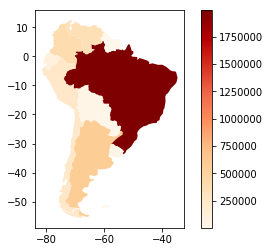

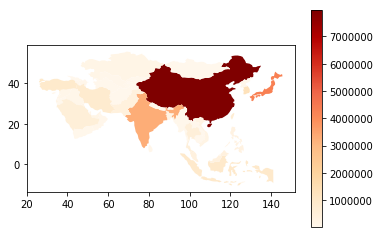

In [25]:
world.crs = {'init' : 'epsg:4326'}
world.to_crs({'init': 'epsg:3395'})

sa = world[world['continent'] == 'South America']
sa.plot(column = 'gdp_md_est', cmap = 'OrRd', legend = True)

asia =  world[world['continent'] == 'Asia']
asia.plot(column = 'gdp_md_est', cmap = 'OrRd', legend = True)


## Goal 4
1. Merge the airports GeoDataFrame and the world GeoDataFrame on spatial data
2. Find the airport in the country with the smallest population estimate

In [26]:
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",63.593500
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,103.599439


In [27]:
gdf.head(2)

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Type,Source,coordinates
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (145.391998291 -6.081689834590001)
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (145.789001465 -5.20707988739)


In [37]:
gdf.crs = {'init' : 'epsg:4326'}
countries = geopandas.sjoin(world,gdf, how = 'inner', op = 'intersects')

small_port = countries.loc[countries['pop_est'].idxmin()]
#print(small_port)
print('The airport in the country with the smallest population estimate is the  Mount Pleasant Airport in the Falkland Islands.')

The airport in the country with the smallest population estimate is the  Mount Pleasant Airport in the Falkland Islands.
